In [694]:
import PIL
from PIL import Image
import glob
import numpy as np
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models

#print("Pillow Version: ", PIL.__version__)


In [695]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Batteries"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

batteries_array = np.array(images)/255

In [696]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Resistors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

resistors_array = np.array(images)/255

In [697]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Capacitors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

capacitor_array = np.array(images)/255

In [698]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Inductors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

inductors_array = np.array(images)/255

In [699]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Ground"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

ground_array = np.array(images)/255

In [700]:
#print(np.shape(ground_array))
labels = ['Ground', 'Resistor', 'Inductor', 'Capacitor', 'Battery']


In [701]:
ground_label = np.zeros(210)
resistor_label = np.ones(210)
inductor_label = 2*np.ones(210)
capacitor_label = 3*np.ones(210)
battery_label = 4*np.ones(210)

In [702]:
ground_array = list(zip(ground_array,ground_label))
resistors_array = list(zip(resistors_array, resistor_label))
inductors_array = list(zip(inductors_array, inductor_label))
capacitor_array = list(zip(capacitor_array, capacitor_label))
batteries_array = list(zip(batteries_array, battery_label))



In [703]:
data_with_labels = np.concatenate((ground_array,resistors_array,inductors_array,capacitor_array,batteries_array))

In [704]:
random.shuffle(data_with_labels)

In [705]:
shuffled_data, shuffled_labels = zip(*data_with_labels)

In [706]:
#print(np.shape(shuffled_data))
train_data,test_data,train_labels,test_labels = train_test_split(shuffled_data, shuffled_labels, test_size = 0.2)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.1)


In [725]:
#print(train_labels[0])
def plot_sample(X,y,index,Labels):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(Labels[int(y[index])])

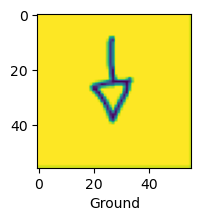

In [708]:
plot_sample(train_data,train_labels,7)
#print(train_labels)

In [709]:
fox = models.Sequential([
    layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu', input_shape=(56,56,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 4, kernel_size = (3,3), activation = 'relu', input_shape=(56,56,1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')


])

In [710]:
fox.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [711]:
train_data = np.asarray(train_data)
train_labels = np.asarray(train_labels)

fox.fit(train_data,train_labels,epochs = 40)

Epoch 1/40
24/24 [==============================] - 2s 62ms/step - loss: 1.3250 - accuracy: 0.5040
Epoch 2/40
24/24 [==============================] - 1s 38ms/step - loss: 1.1720 - accuracy: 0.5159
Epoch 3/40
24/24 [==============================] - 1s 37ms/step - loss: 0.9704 - accuracy: 0.6257
Epoch 4/40
24/24 [==============================] - 1s 39ms/step - loss: 0.6633 - accuracy: 0.7831
Epoch 5/40
24/24 [==============================] - 1s 36ms/step - loss: 0.5106 - accuracy: 0.8254
Epoch 6/40
24/24 [==============================] - 1s 36ms/step - loss: 0.4247 - accuracy: 0.8585
Epoch 7/40
24/24 [==============================] - 1s 45ms/step - loss: 0.3692 - accuracy: 0.8598
Epoch 8/40
24/24 [==============================] - 1s 48ms/step - loss: 0.3286 - accuracy: 0.8730
Epoch 9/40
24/24 [==============================] - 1s 36ms/step - loss: 0.2848 - accuracy: 0.8889
Epoch 10/40
24/24 [==============================] - 1s 36ms/step - loss: 0.2407 - accuracy: 0.9021
Epoch 11/

In [712]:
fox.evaluate(train_data,train_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.0177 - accuracy: 0.9987


[0.017709754407405853, 0.9986772537231445]

In [713]:
val_data = np.asarray(val_data)
val_labels = np.asarray(val_labels)
fox.evaluate(val_data,val_labels)

3/3 [==============================] - 0s 13ms/step - loss: 0.1038 - accuracy: 0.9762


[0.103849396109581, 0.976190447807312]

In [714]:
test_data = np.asarray(test_data)
test_labels = np.asarray(test_labels)
fox.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 16ms/step - loss: 0.3702 - accuracy: 0.9238


[0.37015223503112793, 0.9238095283508301]

In [716]:
fox.save('Model2')

INFO:tensorflow:Assets written to: Model2/assets


INFO:tensorflow:Assets written to: Model2/assets


24/24 [==============================] - 0s 15ms/step


TypeError: only size-1 arrays can be converted to Python scalars

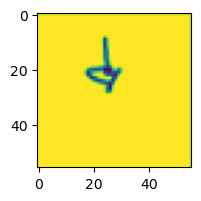

In [726]:
#testing model




